# Books Recommendations System

Maryam Alrubaye
B1905.090004

First we import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, mean_absolute_error

Starting with getting the dataset 

**Note: I downloaded the dataset from my files you can find them in File Explorer. **

In [3]:
books_dataset = pd.read_csv('/content/books_dataset.csv', sep=';',encoding="latin-1")
books_dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Cleaning the books dataset by dropping unused columns :)

In [ ]:
books_dataset = books_dataset.drop(['Image-URL-S', 'Image-URL-M','Image-URL-L','Book-Author','Year-Of-Publication','Publisher'], axis=1)
books_dataset.head()

,ISBN,Book-Title
0,195153448,Classical Mythology
1,2005018,Clara Callan
2,60973129,Decision in Normandy
3,374157065,Flu: The Story of the Great Influenza Pandemic...
4,393045218,The Mummies of Urumchi


In [ ]:
ratings_dataset = pd.read_csv('/content/book-ratings.csv', sep=';', encoding="latin-1")
ratings_dataset.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users_dataset = pd.read_csv('/content/users.csv', sep=';',  encoding="latin-1")
users_dataset.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In order to give a better understanding of how age affects the ratings that users give I will create a bar plot to visualize the average rating given by users in each age range.

first in order to get the correct visulization for our data we need to merge our two dataset by userID

In [ ]:
merged_dataset= pd.merge(users_dataset, ratings_dataset, on='User-ID')
merged_dataset.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


to visualize the age data I will replace any nan value with zero

In [ ]:
merged_dataset['Age'] = merged_dataset['Age'].fillna(0)
merged_dataset.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",0.0,034542252,0
2,8,"timmins, ontario, canada",0.0,0002005018,5
3,8,"timmins, ontario, canada",0.0,0060973129,0
4,8,"timmins, ontario, canada",0.0,0374157065,0


then we need to extract the Age and Book-Rating columns from the users_dataset:

In [ ]:
ages = merged_dataset['Age']
ratings = merged_dataset['Book-Rating']

 now I need to create a new column in the merged_dataset with age ranges

In [ ]:
age_ranges = pd.cut(ages, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
merged_dataset['Age Range'] = age_ranges

Lastly I will calculate the mean rating for each age range then I will extract the names of the age ranges

In [ ]:
age_range_ratings = merged_dataset.groupby(by='Age Range')['Book-Rating'].mean().reset_index()
age_range_names = age_range_ratings['Age Range'].apply(str)

Create a bar plot of the average ratings by age range

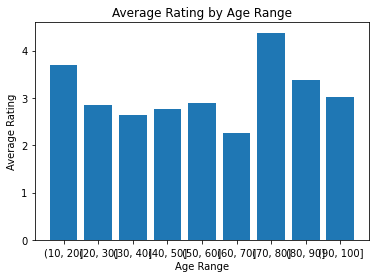

In [ ]:
plt.bar(age_range_names, age_range_ratings['Book-Rating'])
plt.xlabel('Age Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Age Range')
plt.show()

Cleaning the user dataset by dropping unused columns because now I will use the number of rates for each book and the users that rated the book without considering their age :)

In [ ]:
users_dataset = users_dataset.drop(['Age'], axis=1)
users_dataset.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [ ]:
books_rating = pd.merge(ratings_dataset,books_dataset,on="ISBN")
books_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276746,055356451X,0,Night Sins
1,278418,055356451X,0,Night Sins
2,496,055356451X,8,Night Sins
3,5728,055356451X,0,Night Sins
4,5766,055356451X,0,Night Sins


In [ ]:
books_rating = books_rating.dropna(axis = 0, subset = ['Book-Title'])

book_rating_count = (books_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'total_RatingCount'})
     [['Book-Title', 'total_RatingCount']]
    )
book_rating_count.head()

,Book-Title,total_RatingCount
0,A Painted House,647
1,A Second Chicken Soup for the Woman's Soul (Ch...,8
2,A Tally of Types: With Additions by Several Ha...,2
3,A l'Ouest rien de nouveau,16
4,A-Z of Behaving Badly,1


In [ ]:
rating_with_total_rating_count = books_rating.merge(book_rating_count, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_total_rating_count.head()

,User-ID,ISBN,Book-Rating,Book-Title,total_RatingCount
0,276746,055356451X,0,Night Sins,170
1,278418,055356451X,0,Night Sins,170
2,496,055356451X,8,Night Sins,170
3,5728,055356451X,0,Night Sins,170
4,5766,055356451X,0,Night Sins,170


we assign the priorty for rating so we remoive any book that has been rated less than 100 time.

In [ ]:
popularity_threshold = 100
popular_book_rating = rating_with_total_rating_count.query('total_RatingCount >= @popularity_threshold')
popular_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,total_RatingCount
0,276746,055356451X,0,Night Sins,170
1,278418,055356451X,0,Night Sins,170
2,496,055356451X,8,Night Sins,170
3,5728,055356451X,0,Night Sins,170
4,5766,055356451X,0,Night Sins,170


Now we combine our datasets to one dataset.

In [ ]:
combined_datasets = popular_book_rating.merge(users_dataset, left_on = 'User-ID', right_on = 'User-ID', how = 'left')
combined_datasets.head()

,User-ID,ISBN,Book-Rating,Book-Title,total_RatingCount,Location
0,276746,055356451X,0,Night Sins,170,"fort worth, ,"
1,278418,055356451X,0,Night Sins,170,"omaha, nebraska, usa"
2,496,055356451X,8,Night Sins,170,"west salem, wisconsin, usa"
3,5728,055356451X,0,Night Sins,170,"cullowhee, north carolina, usa"
4,5766,055356451X,0,Night Sins,170,"powder springs, georgia, usa"


we take the users that their location only in united kingdom 

In [ ]:
uk_user_rating = combined_datasets[combined_datasets['Location'].str.contains("united kingdom")]
uk_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,total_RatingCount,Location
170,277072,1573229571,9,About a Boy (Movie Tie-In),106,"london, england, united kingdom"
205,104125,1573229571,10,About a Boy (Movie Tie-In),106,"southampton, n/a, united kingdom"
329,81274,042511774X,8,Breathing Lessons,170,"london, england, united kingdom"
373,152939,042511774X,9,Breathing Lessons,170,"glasgow, scotland, united kingdom"
405,209536,042511774X,0,Breathing Lessons,170,"erith, kent, united kingdom"


create a pivot table from a dataframe of book ratings

In [ ]:
uk_user_rating_pivot = uk_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
uk_user_rating_pivot.head()

User-ID,176,1025,5331,12333,23902,37567,41897,56399,76626,81088,...,219951,228313,231854,236655,244277,246156,246528,272225,274004,277072
Book-Title,,,,,,,,,,,,,,,,,,,,,
A Painted House,0.0,0.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
About a Boy (Movie Tie-In),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
Angela's Ashes: A Memoir,0.0,9.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atonement : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Breathing Lessons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now I will create a heatmap to visualize the distribution of ratings for different books. 

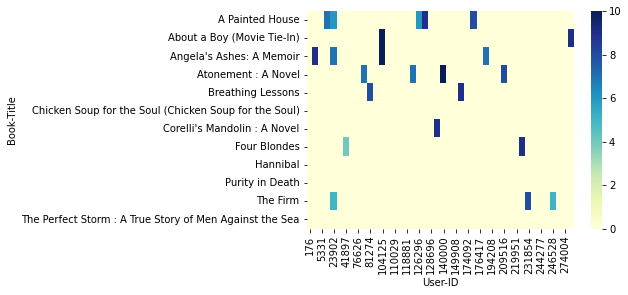

In [ ]:
import seaborn as sns
sns.heatmap(uk_user_rating_pivot, cmap='YlGnBu')
plt.show()

Calculate the mean rating for each book

In [ ]:
mean_ratings = uk_user_rating_pivot.mean(axis=1)
print(mean_ratings)

Book-Title
A Painted House                                            0.818182
About a Boy (Movie Tie-In)                                 0.431818
Angela's Ashes: A Memoir                                   0.750000
Atonement : A Novel                                        0.727273
Breathing Lessons                                          0.386364
Chicken Soup for the Soul (Chicken Soup for the Soul)      0.000000
Corelli's Mandolin : A Novel                               0.204545
Four Blondes                                               0.295455
Hannibal                                                   0.000000
Purity in Death                                            0.000000
The Firm                                                   0.409091
The Perfect Storm : A True Story of Men Against the Sea    0.000000
dtype: float64


Find the most popular books:

In [ ]:
num_ratings = uk_user_rating_pivot.sum(axis=1)
print(num_ratings)

Book-Title
A Painted House                                            36.0
About a Boy (Movie Tie-In)                                 19.0
Angela's Ashes: A Memoir                                   33.0
Atonement : A Novel                                        32.0
Breathing Lessons                                          17.0
Chicken Soup for the Soul (Chicken Soup for the Soul)       0.0
Corelli's Mandolin : A Novel                                9.0
Four Blondes                                               13.0
Hannibal                                                    0.0
Purity in Death                                             0.0
The Firm                                                   18.0
The Perfect Storm : A True Story of Men Against the Sea     0.0
dtype: float64


now we start with implementating KNN algorithm in order to get the best recommend books

In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5)
model_knn.fit(uk_user_rating_pivot)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
indices=model_knn.kneighbors(uk_user_rating_pivot.loc[['Four Blondes']], 5, return_distance=False)
print("the most 5 Recommended Books:")
for index, value in enumerate(uk_user_rating_pivot.index[indices][0]):
    print((index+1),"-",value)

the most 5 Recommended Books:
1 - Four Blondes
2 - Purity in Death
3 - The Firm
4 - Chicken Soup for the Soul (Chicken Soup for the Soul)
5 - Hannibal


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-90-c8e348ca00dc>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  for index, value in enumerate(uk_user_rating_pivot.index[indices][0]):
